Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795

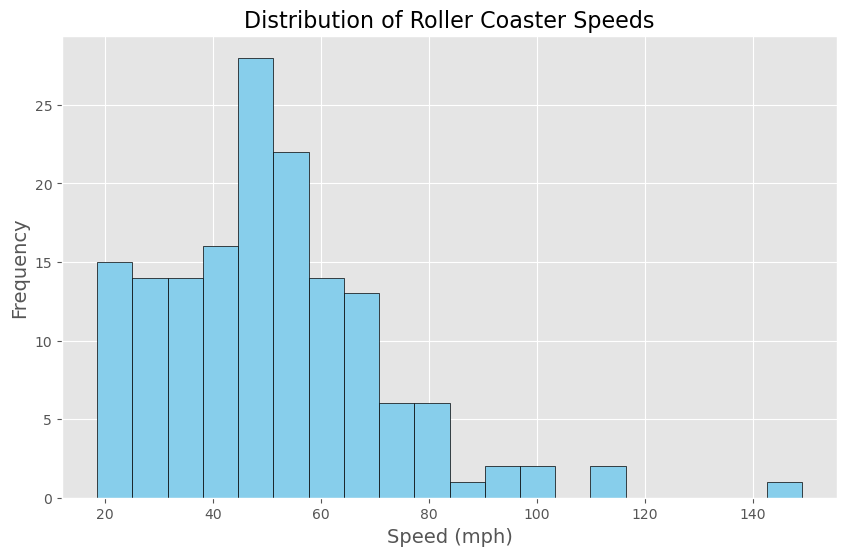

/var/folders/k0/gr2_sq9934q76z0t_y21pmj40000gn/T/ipykernel_19634/3780575931.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed_mph', y='Location', data=average_speed_by_location_sorted.head(10), palette='viridis')


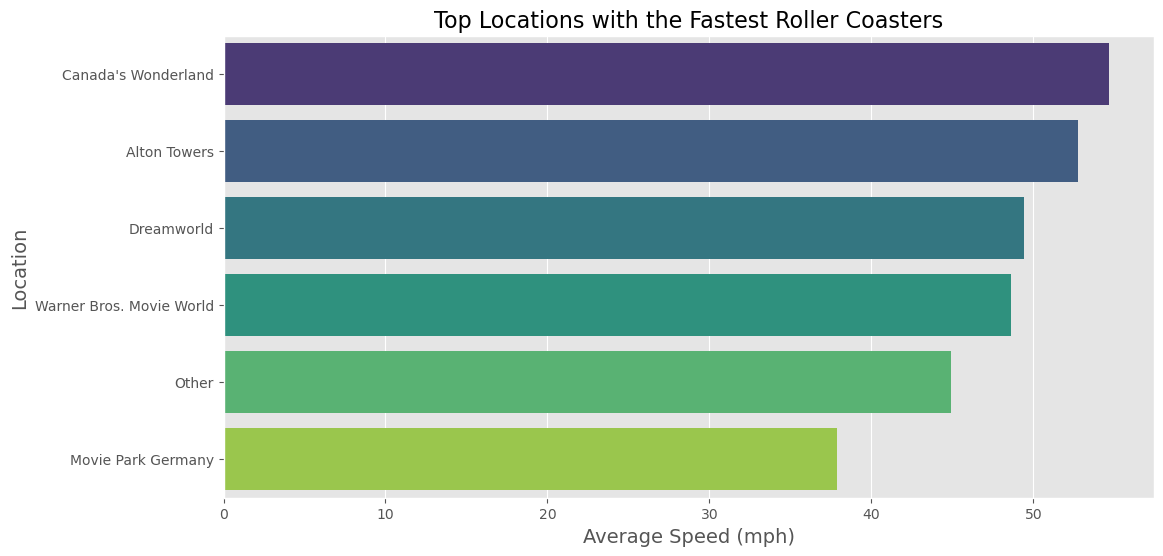

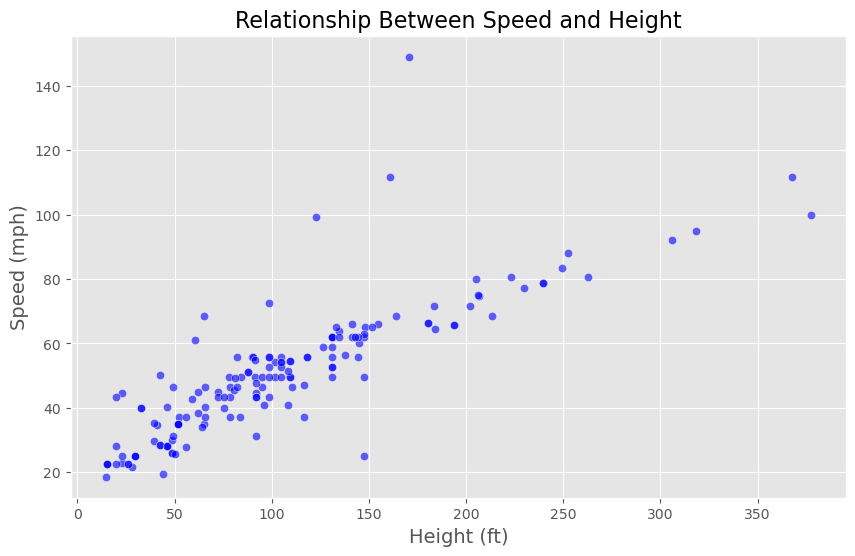

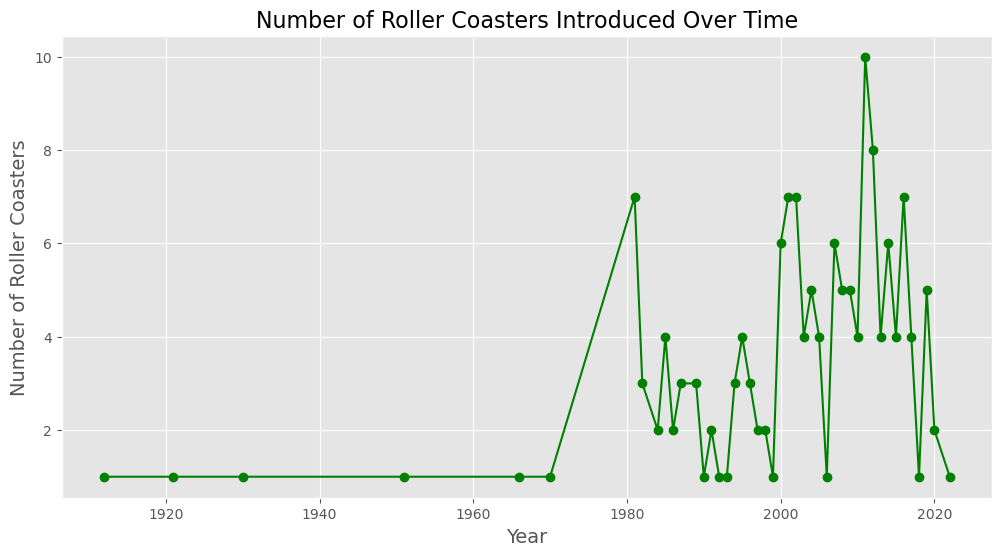


Summary of Findings:
1. The dataset contains roller coasters from various locations, with speed and height data.
2. The average speed of roller coasters is approximately 51.02 mph.
3. The tallest roller coaster is 377.30 feet tall.
4. The top location with the fastest roller coasters is 'Canada's Wonderland' with an average speed of 54.68 mph.
5. There is a positive correlation between roller coaster speed and height.
6. The number of roller coasters introduced has increased over time, peaking around the year 2011.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
df = pd.read_csv('coaster_db.csv')

# Step 2: Understand the Dataset
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Step 3: Data Cleaning
# Drop rows with missing values in key columns
df = df.dropna(subset=['speed_mph', 'height_ft', 'year_introduced'])

# Drop duplicate rows
df = df.drop_duplicates()

# Step 4: Exploratory Data Analysis (EDA)

# 4.1: Distribution of Roller Coaster Speeds
plt.figure(figsize=(10, 6))
df['speed_mph'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Roller Coaster Speeds', fontsize=16)
plt.xlabel('Speed (mph)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 4.2: Top Locations with the Fastest Roller Coasters
# Group by 'Location' and calculate the average speed
average_speed_by_location = df.groupby('Location')['speed_mph'].mean().reset_index()

# Sort by average speed in descending order
average_speed_by_location_sorted = average_speed_by_location.sort_values(by='speed_mph', ascending=False)

# Filter locations with at least 5 roller coasters
location_counts = df['Location'].value_counts()
locations_with_5 = location_counts[location_counts >= 5].index
average_speed_by_location_sorted = average_speed_by_location_sorted[average_speed_by_location_sorted['Location'].isin(locations_with_5)]

# Check if the DataFrame is empty
if average_speed_by_location_sorted.empty:
    print("No locations meet the criteria (minimum of 5 roller coasters).")
else:
    # Plot the top locations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='speed_mph', y='Location', data=average_speed_by_location_sorted.head(10), palette='viridis')
    plt.title('Top Locations with the Fastest Roller Coasters', fontsize=16)
    plt.xlabel('Average Speed (mph)', fontsize=14)
    plt.ylabel('Location', fontsize=14)
    plt.show()

# 4.3: Relationship Between Speed and Height
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_ft', y='speed_mph', data=df, color='blue', alpha=0.6)
plt.title('Relationship Between Speed and Height', fontsize=16)
plt.xlabel('Height (ft)', fontsize=14)
plt.ylabel('Speed (mph)', fontsize=14)
plt.show()

# 4.4: Trend of Roller Coaster Introductions Over Time
df['year_introduced'] = pd.to_datetime(df['year_introduced'], format='%Y')  # Convert to datetime
yearly_introductions = df['year_introduced'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_introductions.plot(kind='line', color='green', marker='o')
plt.title('Number of Roller Coasters Introduced Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Roller Coasters', fontsize=14)
plt.grid(True)
plt.show()

# Step 5: Save the Results
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_roller_coasters.csv', index=False)

# Save the top locations with the fastest roller coasters (if not empty)
if not average_speed_by_location_sorted.empty:
    average_speed_by_location_sorted.head(10).to_csv('top_locations_fastest_coasters.csv', index=False)

# Step 6: Summarize Findings
print("\nSummary of Findings:")
print("1. The dataset contains roller coasters from various locations, with speed and height data.")
print("2. The average speed of roller coasters is approximately {:.2f} mph.".format(df['speed_mph'].mean()))
print("3. The tallest roller coaster is {:.2f} feet tall.".format(df['height_ft'].max()))

if not average_speed_by_location_sorted.empty:
    print("4. The top location with the fastest roller coasters is '{}' with an average speed of {:.2f} mph.".format(
        average_speed_by_location_sorted.iloc[0]['Location'],
        average_speed_by_location_sorted.iloc[0]['speed_mph']
    ))
else:
    print("4. No locations meet the criteria for the fastest roller coasters.")

print("5. There is a positive correlation between roller coaster speed and height.")
print("6. The number of roller coasters introduced has increased over time, peaking around the year {}.".format(
    yearly_introductions.idxmax()
))